<a href="https://colab.research.google.com/github/narsym/deep-learning-with-tensorflow-2.0/blob/master/Deep_Dream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [0]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

Downloading and preprocessing and display fucntions

90112/85266 [===============================] - 0s 0us/step


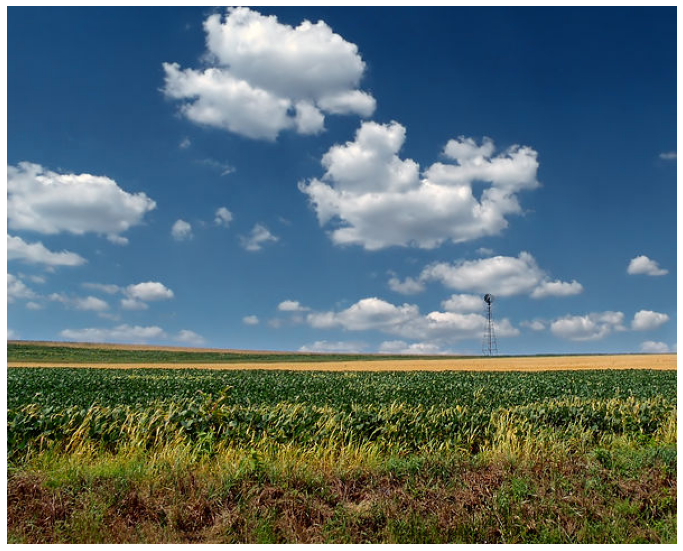

In [3]:
def download(url):
  name = url.split('/')[-1]
  image_path = tf.keras.utils.get_file(name, origin = url)
  img = image.load_img(image_path)
  return image.img_to_array(img)

def preprocess(img):
  return (img / 127.5) - 1

def deprocess(img):
  img = img.copy()
  img = img / 2.0
  img = img + 0.5
  img *= 255.0
  return np.clip(img,0,255).astype('uint8')

def show(img):
  plt.figure(figsize = (12,12))
  plt.grid(False)
  plt.axis('off')
  plt.imshow(img)

url = 'https://storage.googleapis.com/applied-dl/clouds.jpg'
img = preprocess(download(url))
show(deprocess(img))

Initializing the inception v3 model

In [4]:
inception = tf.keras.applications.InceptionV3(include_top = False,weights = 'imagenet')

87916544/87910968 [==============================] - 1s 0us/step


selecting layers for output from the model

In [0]:
names = ['mixed2','mixed3','mixed4','mixed5']
layers = [inception.get_layer(name).output for name in names]

feat_extraction_model = tf.keras.models.Model(inputs = inception.input,outputs = layers)

Forward propagation

In [0]:
def forward(img):
  img_batch = tf.expand_dims(img,axis = 0)
  return feat_extraction_model(img_batch)

Calculating loss

In [0]:
def calc_loss(layer_activation):
  total_loss = 0
  for act in layer_activation:
    loss = tf.math.reduce_mean(act)
    loss /= np.prod(act.shape)
    total_loss += loss
    
  return total_loss

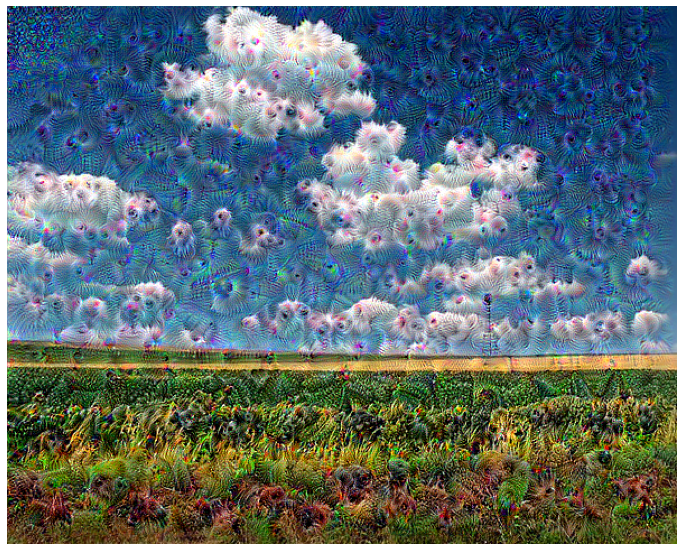

In [8]:
from IPython.display import clear_output
img = tf.Variable(img)
steps = 400
for step in range(steps):

  with tf.GradientTape() as tape:
    activations = forward(img)
    loss = calc_loss(activations)

  gradients = tape.gradient(loss,img)

  gradients /= gradients.numpy().std() + 1e-8
  img.assign_add(gradients)
  if step % 50 == 0:
    clear_output()
    print('step %d, loss %f' % (step,loss))
    show(deprocess(img.numpy()))
    plt.show()


clear_output()
show(deprocess(img.numpy()))

This is the result